# W12 - Exercise

use the dataset __healthcare_dataset__ for this exercise

Column details: <br>
- **Name**: This column represents the name of the patient associated with the healthcare record. <br>
- **Age**: The age of the patient at the time of admission, expressed in years. <br>
- **Gender**: Indicates the gender of the patient, either "Male" or "Female."<br>
- **Blood** Type: The patient's blood type, which can be one of the common blood types (e.g., "A+", "O-", etc.).<br>
- **Medical** Condition: This column specifies the primary medical condition or diagnosis associated with the patient, such as "Diabetes," "Hypertension," "Asthma," and more.<br>
- **Date of Admission**: The date on which the patient was admitted to the healthcare facility.<br>
- **Doctor**: The name of the doctor responsible for the patient's care during their admission.<br>
- **Hospital**: Identifies the healthcare facility or hospital where the patient was admitted.<br>
- **Insurance Provider**: This column indicates the patient's insurance provider, which can be one of several options, including "Aetna," "Blue Cross," "Cigna," "UnitedHealthcare," and "Medicare."<br>
- **Billing Amount**: The amount of money billed for the patient's healthcare services during their admission. This is expressed as a floating-point number.<br>
- **Room Number**: The room number where the patient was accommodated during their admission.<br>
- **Admission Type**: Specifies the type of admission, which can be "Emergency," "Elective," or "Urgent," reflecting the circumstances of the admission.<br>
- **Discharge Date**: The date on which the patient was discharged from the healthcare facility, based on the admission date and a random number of days within a realistic range.<br>
- **Medication**: Identifies a medication prescribed or administered to the patient during their admission. Examples include "Aspirin," "Ibuprofen," "Penicillin," "Paracetamol," and "Lipitor."<br>
- **Test Results**: Describes the results of a medical test conducted during the patient's admission. Possible values include "Normal," "Abnormal," or "Inconclusive," indicating the outcome of the test.<br>

This exercise is applicable to multiple machine learning algorithms. Create EDA to visualize data and results and explore as far as you can.
Task:
1. Data Cleaning, Transformation
2. Visualization (EDA)
3. Use at least one machine learning techniques (Regression, Classification, Clustering)
4. Use different modelling algorithm to compare results (XGBoost, KNN, Hierarchical, Apriori, Linear, Logistic, etc)

This exercise is to test your willingness to explore, critical thinking and the knowledge when to use what algorithms to achieve a purpose. 

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.cluster import KMeans
import xgboost as xgb

In [135]:
healthcare_df = pd.read_csv('healthcare_dataset.csv')

healthcare_df.info()

healthcare_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [136]:
healthcare_df.isnull().sum()

healthcare_df['Date of Admission'] = pd.to_datetime(healthcare_df['Date of Admission'])

label_encoder = LabelEncoder()
healthcare_df['Gender'] = label_encoder.fit_transform(healthcare_df['Gender'])

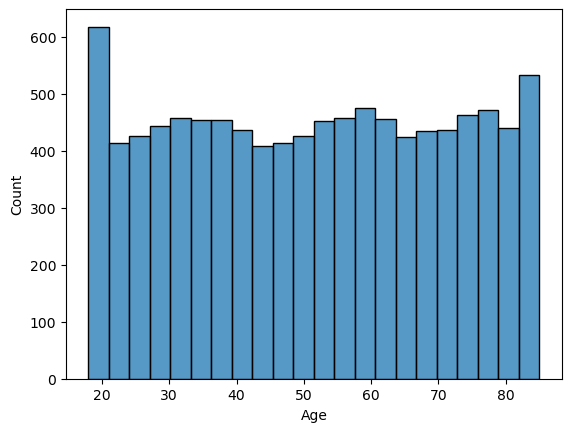

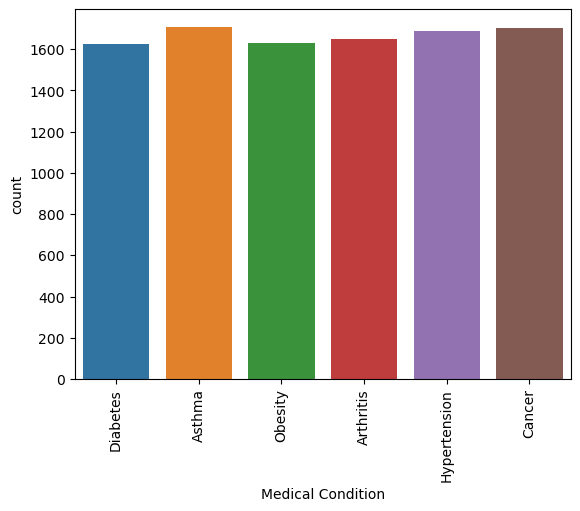

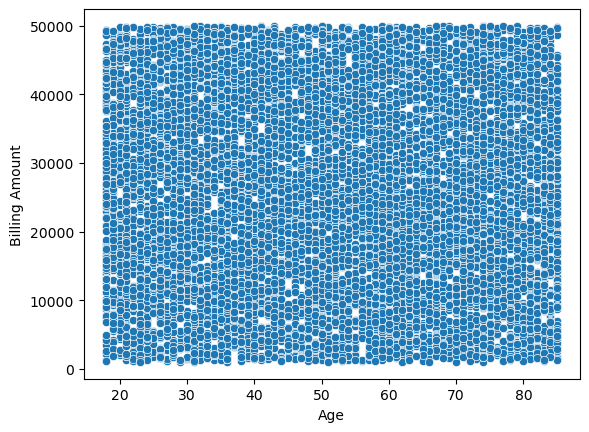

/var/folders/gg/_npm1snd6_71mn1w6clr8rlm0000gp/T/ipykernel_82897/1757247463.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = healthcare_df.corr()


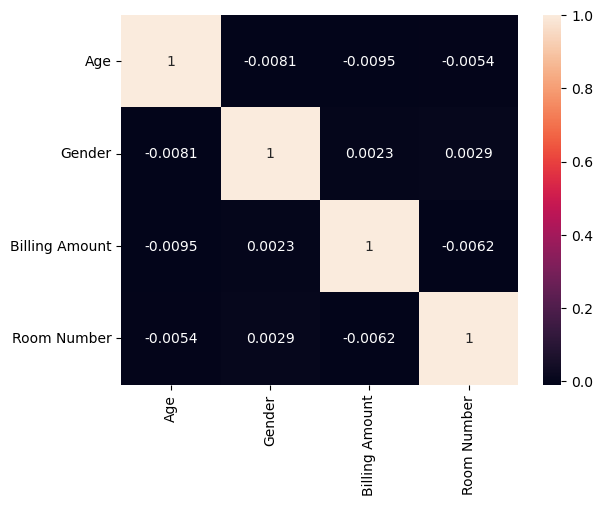

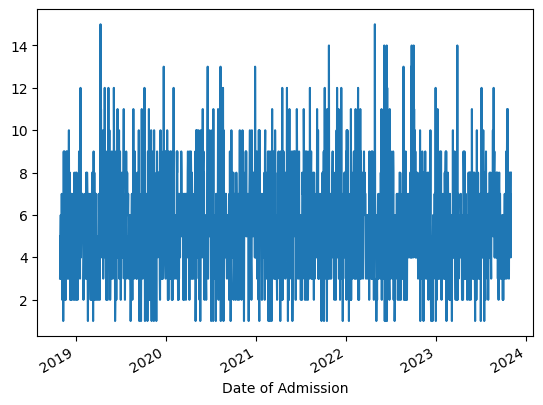

In [137]:
sns.histplot(healthcare_df['Age'])
plt.show()

sns.countplot(x='Medical Condition', data=healthcare_df)
plt.xticks(rotation=90)
plt.show()

sns.scatterplot(x='Age', y='Billing Amount', data=healthcare_df)
plt.show()

correlation_matrix = healthcare_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

time_series = healthcare_df.groupby('Date of Admission').size()
time_series.plot()
plt.show()

In [138]:
categorical_columns = healthcare_df.select_dtypes(include=['object']).columns.tolist()

for col in categorical_columns:
    healthcare_df[col] = pd.factorize(healthcare_df[col])[0]

In [139]:
non_numeric_columns = ['Name', 'Doctor', 'Hospital', 'Discharge Date']
healthcare_df = healthcare_df.drop(non_numeric_columns, axis=1)

In [140]:
datetime_columns = healthcare_df.select_dtypes(include=['datetime64']).columns.tolist()
print(datetime_columns)

['Date of Admission']


In [141]:
from datetime import datetime

healthcare_df['Date of Admission'] = pd.to_numeric(healthcare_df['Date of Admission'])

In [142]:
X = healthcare_df.drop(['Billing Amount'], axis=1)
y = healthcare_df['Billing Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

reg_model = RandomForestRegressor()
reg_model.fit(X_train, y_train)

y_pred = reg_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 209815571.0818498


In [143]:
X_class = healthcare_df.drop(['Medical Condition'], axis=1)
y_class = healthcare_df['Medical Condition']

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

class_model = RandomForestClassifier()

class_model.fit(X_train_class, y_train_class)

y_pred_class = class_model.predict(X_test_class)

accuracy = accuracy_score(y_test_class, y_pred_class)
print(f"Accuracy: {accuracy}")

Accuracy: 0.161


In [144]:
X_cluster = healthcare_df.drop(['Room Number', 'Date of Admission', 'Gender', 'Age', 'Test Results'], axis=1)

scaler = StandardScaler()
X_cluster_scaled = scaler.fit_transform(X_cluster)

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(X_cluster_scaled)

healthcare_df['Cluster'] = kmeans.labels_

print(healthcare_df)

/Users/rae/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Age  Gender  Blood Type  Medical Condition    Date of Admission  \
0      81       0           0                  0  1668643200000000000   
1      35       1           1                  1  1685577600000000000   
2      61       1           2                  2  1546992000000000000   
3      49       1           2                  1  1588377600000000000   
4      51       1           0                  3  1625788800000000000   
...   ...     ...         ...                ...                  ...   
9995   83       1           4                  2  1659052800000000000   
9996   47       0           3                  3  1641427200000000000   
9997   54       1           2                  3  1656633600000000000   
9998   84       1           4                  3  1580947200000000000   
9999   20       1           2                  3  1679443200000000000   

      Insurance Provider  Billing Amount  Room Number  Admission Type  \
0                      0    37490.983364          

In [145]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_preds = linear_reg.predict(X_test)

logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_class, y_train_class)
logistic_reg_preds = logistic_reg.predict(X_test_class)

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)

print("Linear Regression Predictions:")
print(linear_reg_preds)

print("\nLogistic Regression Predictions:")
print(logistic_reg_preds)

print("\nXGBoost Predictions:")
print(xgb_preds)

Linear Regression Predictions:
[25733.45234994 25207.8865495  25357.04773827 ... 25208.79096613
 25777.48182313 25657.10113739]

Logistic Regression Predictions:
[1 1 1 ... 1 1 1]

XGBoost Predictions:
[20741.932 36402.613 30844.857 ... 27365.219 15275.792 22652.863]
